In [2]:
import numpy as np
import matplotlib.pyplot as matplt
from scipy import stats
from scipy.stats import skewnorm

In [3]:
# Color palette:
colors = {
    "background": "#282A35",
    "line": "#44475a",
    "foreground": "#f8f8f2",
    "comment": "#6272a4",
    "cyan": "#8be9fd",
    "green": "#50fa7b",
    "orange": "#ffb86c",
    "pink": "#ff79c6",
    "purple": "#bd93f9",
    "red": "#ff5555",
    "yellow": "#f1fa8c",
}

# Matplolib Aesthetics
matplt.rc(
    "axes",
    facecolor=colors["background"],
    edgecolor=colors["foreground"],
    labelcolor=colors["foreground"],
    axisbelow=True,
    # prop_cycle=colors,
)
matplt.rc("xtick", direction="out", color=colors["foreground"])
matplt.rc("ytick", direction="out", color=colors["foreground"])
matplt.rc("lines", linewidth=2)

matplt.rc("figure", facecolor=colors["background"], edgecolor=colors["background"])
matplt.rc("text", color=colors["foreground"])


# Playground: MCMC easy version

In [5]:
def mcmc(p, initial_guess, steps=1000):
    """
    Markov Chain Monte Carlo Implementation.
    Only sample for one parameter.

    Parameters
    ----------
    p : method
        Guess PDF function 
    initial_guess : int
        initial value for the parameter we want to sample
    third : int, optional
        number of iterations, by default 100

    Returns
    -------
    array_like
        Markov Chain sample

    """
    sample = np.zeros(steps)

    # Inital value
    x = initial_guess
    p_x = p(x)

    for i in range(steps):

        # Generate proposal
        x_star = x + np.random.normal(0, 0.5)
        p_star = p(x_star)

        # Accept or reject step
        acceptance_probablity = p_star / p_x
        u = np.random.random()

        if acceptance_probablity >= u:
            sample[i] = x_star
            p_x = p_star
            x = x_star
        else:
            sample[i] = x

    return sample

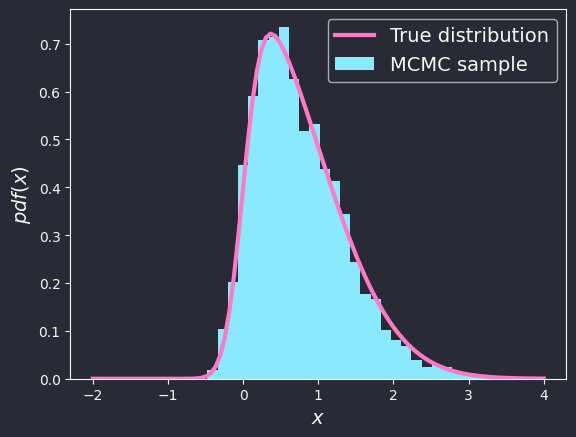

In [12]:
# The distribution of interest
func = stats.skewnorm(5)

# MCMC
p = func.pdf
samples = mcmc(p, 3, 10000)

# Exact distribution (we dont have this in general)
x = np.linspace(-2, 4, 100)
y = p(x)

# Plotting
matplt.plot(x, y, lw=3, label='True distribution', color=colors['pink'])
matplt.hist(samples, bins=30, density=True, label='MCMC sample', color=colors['cyan'])
matplt.xlabel('$x$', fontsize=14)
matplt.ylabel('$pdf(x)$', fontsize=14)
matplt.legend(fontsize=14)
matplt.show()